# Introduction to
{{ badge }}

Gradio is a powerful, open-source library for building user interfaces (UI) in Python. It allows developers to easily create web-based interfaces for machine learning models, data visualization, and other Python scripts. With Gradio, you can easily share your work with a wider audience and make your models accessible to non-technical users.

Here are some of the key features of Gradio:
- **Easy to use**: Gradio has a simple and intuitive API that makes it easy to get started.
- **Built-in support for popular ML libraries**: Gradio has built-in support for popular ML libraries like TensorFlow, Keras, and PyTorch, allowing you to easily deploy your models.
- **Customizable**: Gradio provides options for adding custom HTML, JavaScript, and CSS to the interface, allowing you to customize the look and feel of your application.
- **Advanced features**: Gradio provides advanced features such as authentication and access control, logging, monitoring, and more.

You can easily install Gradio using `pip` and start building your interface with as little as few lines of code. The library is well-documented and there are plenty of resources and tutorials available to help you get started.

For more information, you can check out the [official documentation](https://gradio.app/docs) and the [GitHub repository](https://github.com/gradio-app/gradio)


## Table of Contents <a name="toc"></a>
* [Concepts](#concepts)
* [Components](#components)
* [Code Examples](#code-examples)
    * [Greetings](#greetings)
    * [Calculator](#calculator)
    * [MNIST Classifier](#mnist-classifier)


## Concepts <a name="concepts"></a>

- **Interfaces**: In Gradio, an interface is a web-based UI that allows users to interact with a machine learning model or other Python script. An interface can be built using the `gr.Interface` class and can consist of inputs, outputs, and custom HTML, JavaScript and CSS.

- **Run function**: The run function is a python function that takes the inputs as inputs and returns the outputs. It is the backbone of the interface, it is the function that will be executed when the user interacts with the interface.

- **Inputs**: An input is a parameter that the user can interact with to generate the output. For example, an image classifier would have an input of an image. In Gradio, inputs can be created using the `gr.inputs` function.

- **Outputs**: An output is the result generated by the model or script based on the inputs. In Gradio, outputs can be created using the `gr.outputs` function.

- **Customization**: Gradio provides options for customizing the look and feel of the interface using HTML, CSS and JavaScript. Additionally, it also provides options for customizing the functionality and behavior of the interface.

- **Launching**: Once the interface is created, it can be launched by calling the `launch()` function on the interface object. This will open the interface in a new browser tab.

- **Sharing**:  Once the interface is launched, it can be shared with others via a shareable link. This allows others to use the interface without having to run the code locally.

## Components <a name="components"></a>

Gradio has built-in support for several types of inputs and outputs, which can be used to create a wide range of interfaces, some of the most common ones are listed below:

### Inputs
- **Textbox**: Accepts a single line of text input from the user. Can be customized with options such as `label`, `placeholder`, `default`.
- **Checkbox**: Accepts a boolean input from the user. Can be customized with options such as `label`, `default`.
- **Radio**: Accepts one option from a set of options provided by the user. Can be customized with options such as `label`, `options`, `default`.
- **Select**: Accepts one option from a set of options provided by the user. Can be customized with options such as `label`, `options`, `default`.
- **Slider**: Accepts a numeric input from the user within a range provided by the user. Can be customized with options such as `label`, `min`, `max`, `step`, `default`.
- **File**: Accepts a file input from the user. Can be customized with options such as `label`, `allowed_extensions`.
- **Image**: Accepts an image input from the user. Can be customized with options such as `shape`, `label`.

### Outputs
- **Textbox**: Displays a single line of text. Can be customized with options such as `label`.
- **Label**: Displays probability scores for a set of classes. Can be customized with options such as `label`, `num_top_classes`.
- **Plot**: Displays a plot. Can be customized with options such as `label`.
- **Chatbot**: Displays a chatbot interface. Can be customized with options such as `label`.


All of these components can be easily used by importing them from the `gradio.inputs` and `gradio.outputs` modules. For more information, you can check out the [official documentation](https://gradio.app/docs/#components)

## Code Examples <a name="code-examples"></a>

In [ ]:
# As of writing this tutorial, Gradio is not available by default on Google Colab and needs to be installed manually, to install it run this cell
!pip install gradio

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import gradio as gr

### Greetings <a name="greetings"></a>
A simple interface that takes a name as input and returns a greeting as output.

In [ ]:
def greeting(name):
  return f"Hello {name}!"

interface = gr.Interface(
    fn=greeting,
    inputs= gr.inputs.Textbox(label="Your Name", placeholder="Enter your name here"),
    outputs= gr.inputs.Textbox(label="Greeting")
)

interface.launch()

### Calculator <a name="calculator"></a>
A simple interface that takes two numbers and operation as input and returns the result as output.

In [2]:
def calculate(num1, num2, op):

  output = ""

  if op == "+":
    output = num1 + num2
  elif op == "-":
    output = num1 - num2
  elif op == "*":
    output = num1 * num2
  elif op == "/":
    if num2 != 0:
      output = num1 / num2
    else:
      output = "Division by zero is not allowed"
  else:
    output = "Unsupported operation"

  return output

interface = gr.Interface(
    fn=calculate,
    inputs= [
        gr.inputs.Number(label="Number 1"),
        gr.inputs.Number(label="Number 2"),
        gr.inputs.Radio(choices=["+","-", "*", "/"], label="Choose the Operation", default="+"),
    ],
    outputs= gr.inputs.Textbox(),
    title="Super Awesome Calculator",
    description="This calculator takes in any two numbers and does all four major operations on them, isn't that awesome?!",
    live=True
)

interface.launch(debug=True, share=True)

### MNIST Classifier <a name="mnist-classifier"></a>
A simple interface that takes an image as input and returns the predicted digit as output.

#### Prepare Model

In [5]:
# Load and preprocess the data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train.shape, y_train.shape, x_test.shape, y_train.shape

11493376/11490434 [==============================] - 3s 0us/step


((60000, 28, 28), (60000,), (10000, 28, 28), (60000,))

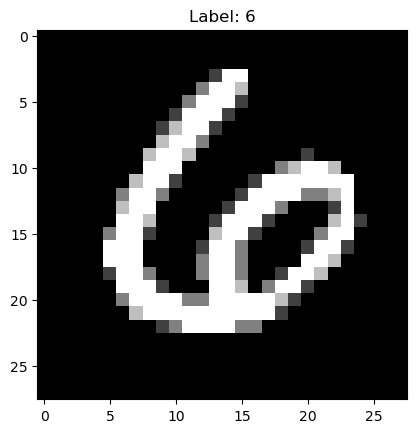

In [6]:
# Pick a random image index
index = np.random.randint(0, x_train.shape[0])

# Plot the image
plt.imshow(x_train[index], cmap='gray')
plt.title("Label: " + str(y_train[index]))
plt.show()


In [7]:
# reshape the data to be in the format (batch_size, input_dim) because Dense layers require one dimensional input
x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

x_train.shape, x_test.shape


((60000, 784), (10000, 784))

In [8]:
# Normalize the data
x_train = x_train / 255.0
x_test = x_test / 255.0


In [ ]:
# convert the labels from integers to categorical using one hot encoding
depth = len(set(y_train)) # calculate the number of classes to use as depth
y_train = tf.one_hot(y_train, depth=depth)
y_test = tf.one_hot(y_test, depth=depth)

y_train.shape, y_test.shape

In [10]:
# fetch the input shape, i.e. the number of features
input_shape = x_train.shape[1] # input_shape = 784

model = tf.keras.Sequential([
    # input layer
    tf.keras.layers.Input(shape=(input_shape)),
    # hidden layers
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    # output layer
    tf.keras.layers.Dense(10, activation='softmax')
])

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [11]:
loss_fn = tf.losses.CategoricalCrossentropy()
optimizer = tf.optimizers.Adam(learning_rate=0.001)
metrics = [tf.keras.metrics.CategoricalAccuracy()]

# Compile the model
model.compile(optimizer=optimizer, loss=loss_fn, metrics=metrics)


In [12]:
model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_test, y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 17s 276us/sample - loss: 0.2821 - categorical_accuracy: 0.9145 - val_loss: 0.1135 - val_categorical_accuracy: 0.9662
Epoch 2/10
60000/60000 [==============================] - 16s 267us/sample - loss: 0.1299 - categorical_accuracy: 0.9617 - val_loss: 0.0804 - val_categorical_accuracy: 0.9751
Epoch 3/10
60000/60000 [==============================] - 19s 316us/sample - loss: 0.1010 - categorical_accuracy: 0.9691 - val_loss: 0.0844 - val_categorical_accuracy: 0.9734
Epoch 4/10
60000/60000 [==============================] - 21s 348us/sample - loss: 0.0812 - categorical_accuracy: 0.9749 - val_loss: 0.0772 - val_categorical_accuracy: 0.9777
Epoch 5/10
60000/60000 [==============================] - 20s 326us/sample - loss: 0.0708 - categorical_accuracy: 0.9788 - val_loss: 0.0674 - val_categorical_accuracy: 0.9804
Epoch 6/10
60000/60000 [==============================] - 19s 318us/sample 

#### Create Interface #1
This interface takes an image as input and returns the predicted digit as output.

In [ ]:
def predict_mnist(img):
    # check if no image is passed
    if img is None:
        return "You didn't pass an image"

    # reduce the three color channel to single grayscale value
    img = tf.image.rgb_to_grayscale(img)
    # reshape/flatten the image
    img = tf.reshape(img, (1, 28 * 28))
    # cast tensor values to float32
    img = tf.cast(img, tf.float32)
    # normalize pixel values between 0 and 1
    img = img / 255.0

    # getting the predictions of the model
    prediction = model.predict(img)
    prediction = prediction[0]
    # getting the index of the highest probability
    index = tf.argmax(prediction)

    return int(index)


interface = gr.Interface(
    # function that will be called when the user inputs an image
    fn=predict_mnist,
    # the input the user will use to interact with the function
    inputs=gr.inputs.Image(shape=(28, 28)),
    # the output the user will see after interacting with the function
    outputs=gr.inputs.Textbox(label="Predicted Digit"),
    # title of the interface
    title="Hand-written digits recognizer",
    # description of the interface
    description="Neural network to accurately predict a hand-written digit based on an image",
)
# launch the interface and allow sharing
interface.launch()

#### Create Interface #2
This interface takes an image as input and returns the predicted digit as output. It also shows the probability of each digit.

In [ ]:
def predict_mnist(img):
    # check if no image is passed
    if img is None:
        return "You didn't pass an image"

    # reduce the three color channel to single grayscale value
    img = tf.image.rgb_to_grayscale(img)
    # reshape/flatten the image
    img = tf.reshape(img, (1, 28 * 28))
    # cast tensor values to float32
    img = tf.cast(img, tf.float32)
    # normalize pixel values between 0 and 1
    img = img / 255.0

    # getting the predictions of the model
    prediction = model.predict(img)
    prediction = prediction[0]

    labels = dict()

    for i in range(len(prediction)): # loop through all the predictions
        labels[f"{i}"] = float(prediction[i]) # add the prediction to the dictionary

    return labels


interface = gr.Interface(
    # function that will be called when the user inputs an image
    fn=predict_mnist,
    # the input the user will use to interact with the function
    inputs=gr.inputs.Image(shape=(28, 28)),
    # the output the user will see after interacting with the function
    outputs=gr.outputs.Label(label="Predicted Digit", num_top_classes=3),
    # title of the interface
    title="Hand-written digits recognizer",
    # description of the interface
    description="Neural network to accuratly predict a hand-written digit based on an image",
    # options for flagging
    flagging_options=["Incorrect Prediction", "Program Error"],
    # directory to store flags in, if not specified, flags will be stored in a folder called flags in the current directory
    # it's a good idea to specify a different directory for each interface
    flagging_dir="mnist_experiment_2"
)
# launch the interface and allow sharing
interface.launch(share=True)
